In [3]:
##Essentiellement basé sur l'implémentation ici https://automaticaddison.com/extended-kalman-filter-ekf-with-python-code-example/
import math
import numpy as np
import matplotlib.pyplot as plt
# import BaseDiff


In [4]:
#Paramètres 
dt = 0.1 #pas de temps
F = np.eye(3) #Matrice F dans le modèle Xt+1 = F*Xt + B*u
H = np.eye(3) #Matrice de mesure utilisée pour convertir les états estimés en états mesurés par les sensors au temps k 
R = np.eye(3) #Matrice bruit erreur de mesure à adapter en fonction de la confiance dans la mesure
Q = np.eye(3) #Matrice de bruit. Plus les entrées sont grandes, plus la variance des changements de mesures des sensors est gérée

In [5]:
#Modèle de déplacement utilisé pour prédire le prochain état 
#Paramètres position au temps t X = [x,y,theta] u = [v, omega]
#xt+1 = xt + v cos(theta)
#yt+1 = yt + v sin(theta) 
#theta_t+1 = theta_t + omega
#A adapter peut-être à notre problème
def motionModel(X,u) :
    B = np.array([[dt*math.cos(X[2]),0],[dt*math.sin(X[2]),0],[0,dt]])
    return (F@X) + (B@u)

In [6]:
#Prédiction du prochain état avant l' EKF
def prochainEtat(X,u) :
    bruit = np.array([0.01,0.01,0.003])

    return motionModel(X,u) + bruit

In [7]:
prochainEtat([9,0.5,0.5],[1.3,0.7])

array([9.12408573, 0.57232532, 0.573     ])

In [8]:
#Extended Kalman Filter

def ekf(posTriang,posprec,uk,covetatPrec) :
    #Estimation de l'état avant EKF : 
    posEstim = prochainEtat(posTriang,uk)
    #Calcul de la covariance de l'état 
    Pk = F @ covetatPrec @ F.T + Q
    #residu entre position donnée par la triangulation et la position estimée posEstim
    residu = posEstim - posTriang
    
    S = H @ Pk @ H.T + R
    
    #Initialisation de K
    K = Pk @ H.T @ np.linalg.pinv(S)
    
    # Update the state covariance estimate for time k
    Pk = Pk - (K @ H @ Pk)
    #Mise à jour de la position 

    posUpdate = posEstim + K@residu

    # Return the updated state and covariance estimates
    return posUpdate, Pk
    

In [9]:
ekf([9.353,0.284,0.007],[4.721,0.143,0.006],[4.5,0],np.eye(3))

(array([10.11964829,  0.30591662,  0.012     ]),
 array([[0.66666667, 0.        , 0.        ],
        [0.        , 0.66666667, 0.        ],
        [0.        , 0.        , 0.66666667]]))

In [10]:
#Liste de 100 positions aléatoires
listePosObs = []
for i in range(100):
    listePosObs.append(np.random.uniform(0, 200, (3,1)))

In [16]:
#Test de ekf
#Position initiale 
posOptim = np.zeros(3)
#Matrice de covariance initiale
cov = np.eye(3)
distPosOptEstim = np.zeros(100)
compteur = 0
listePosOptim = []
for pos in listePosObs :
    posOptim, cov = ekf(pos,posOptim,[4.5,0],cov)
    distPosOptEstim[compteur] = np.linalg.norm(posOptim - pos)

    listePosOptim.append(posOptim)
    compteur = compteur + 1


C:\Users\fanny\AppData\Local\Temp\ipykernel_2252\1971835064.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  B = np.array([[dt*math.cos(X[2]),0],[dt*math.sin(X[2]),0],[0,dt]])


In [24]:
pos

array([[ 59.47614467],
       [102.51516783],
       [189.21289968]])

In [22]:
np.linalg.norm([1, 2, 3












































































])

3.7416573867739413

In [23]:
(1+4+9)**0.5

3.7416573867739413

In [19]:
help(np.linalg.norm)

Help on _ArrayFunctionDispatcher in module numpy.linalg:

norm(x, ord=None, axis=None, keepdims=False)
    Matrix or vector norm.
    
    This function is able to return one of eight different matrix norms,
    or one of an infinite number of vector norms (described below), depending
    on the value of the ``ord`` parameter.
    
    Parameters
    ----------
    x : array_like
        Input array.  If `axis` is None, `x` must be 1-D or 2-D, unless `ord`
        is None. If both `axis` and `ord` are None, the 2-norm of
        ``x.ravel`` will be returned.
    ord : {non-zero int, inf, -inf, 'fro', 'nuc'}, optional
        Order of the norm (see table under ``Notes``). inf means numpy's
        `inf` object. The default is None.
    axis : {None, int, 2-tuple of ints}, optional.
        If `axis` is an integer, it specifies the axis of `x` along which to
        compute the vector norms.  If `axis` is a 2-tuple, it specifies the
        axes that hold 2-D matrices, and the matrix nor

In [17]:
iterations = np.arange(0,100)

Text(0, 0.5, '||position triangulée-EKF||')

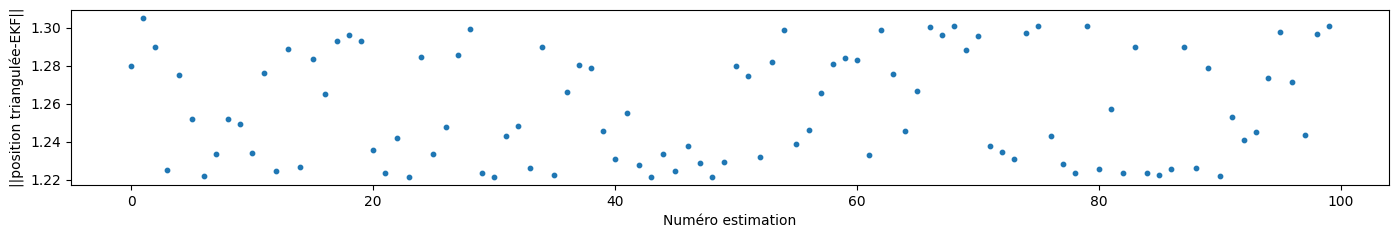

In [18]:
#Ecarts position triangulée et EKF
plt.figure(figsize=(17,5))
plt.subplot(2, 1, 1)
plt.scatter(iterations,distPosOptEstim , marker='o', s=10, label="True label")
plt.xlabel('Numéro estimation')
plt.ylabel("||position triangulée-EKF||")
